# Exhibition: Local Linear Embedding Algorithm

### Imports

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import sklearn, sklearn.datasets

### Dataset (Swiss Roll)

In [3]:
X, T = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=0.25)

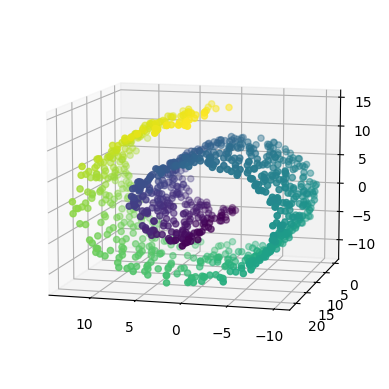

In [5]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=10., azim=105)
ax.scatter(X[:,0],X[:,1],X[:,2],c=T)
plt.show()

### LLE Algorithm

In [7]:
def LLE(X, k):
    N = len(X)
    W = np.zeros([N,N])
    
    for i in range(N):
        x = X[i]

        dists = ((x - X)**2).sum(axis=1)**.5
        dists[i] = float('inf')

        ind = dists < sorted(dists)[k]
        diff = x - X[ind]
        C = np.dot(diff, diff.T)
        C = C  + 0.05 * np.identity(k)
        w = np.linalg.solve(C, np.ones(k))

        w = w / w.sum()

        W[i,ind] = w
    
    M = np.identity(N) - W - W.T + np.dot(W.T,W)
    E = np.linalg.svd(M)[0][:,-3:-1]
    
    return E

### Testing Different Parameters

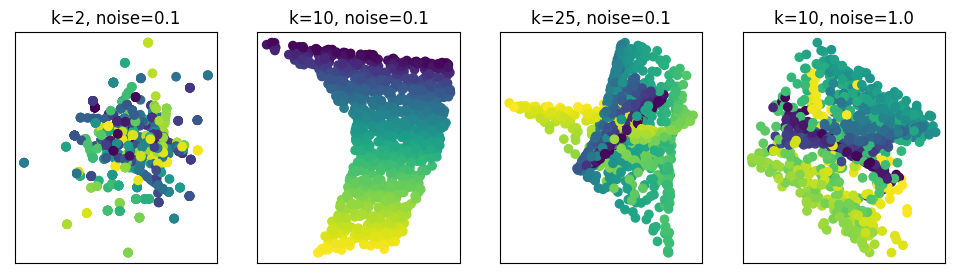

In [8]:
f = plt.figure(figsize=(12,3))
for t,(k,noise) in enumerate([(2,0.1),(10,0.1),(25,0.1),(10,1)]):
    X,T = sklearn.datasets.make_swiss_roll(n_samples=1000, noise=noise)
    embedding = LLE(X,k=k)
    ax = f.add_subplot(1,4,t+1)
    ax.set_title('k=%d, noise=%.1f'%(k,noise))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.scatter(embedding[:,0],embedding[:,1],c=T)